Text(0, 0.5, '$ψ(x)$')

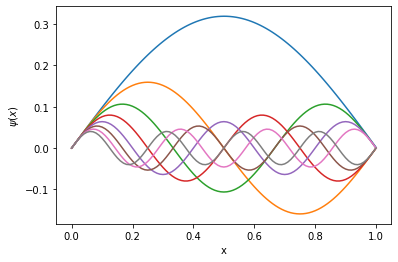

In [97]:
# This program is coded to find the solutions of the Schrodinger Equation for a particle in a box using the shooting method

# Importing the essential libararies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




Nsteps = 10000  # the number of steps

E = np.linspace(0, 700, Nsteps) # the array for the energy

# The incial coditions for ψ and dψ.
ψ = 0
dψ = 1


dx = 0.01   # step size for x
L = 1       # length of the box

# Lists for values at the bounderies and energies over the bounderies.
OverBd= []
Bd = [] 



# defining a function for a particle in a box 
def P_Box(ψ0, dψ0, E):
    
    x = 0    
    
    # creating a loop to calculate the Schrodinger equation and its derivative
    while x < L:
        ddψ = -E * ψ0
        dψ0 += ddψ * dx
        ψ0 += dψ0 * dx
        x += dx
    return(ψ0)


# creating a loop to reassign the energies
for En in E:
    Bd.append(P_Box(ψ, dψ, En))
    

# ceating a loop to account for the bounderies of the box
for i in range(Nsteps-1):

    if Bd[i] > 0 and Bd[i+1] < 0:
        OverBd.append((E[i] + E[i+1])/2)
        
    if Bd[i] < 0 and Bd[i+1] > 0:
        OverBd.append((E[i] + E[i+1])/2)


# creating loops and lists to using the euler method to calculate the wave-function
for En in OverBd:
    ψ = [0] 
    dψ = [1]
    x = [0]
    while x[-1] < L:
        ddψ = -En * ψ[-1] 
        dψ.append(dψ[-1] + ddψ * dx)
        ψ.append(ψ[-1] + dψ[-1] * dx)
        x.append(x[-1] + dx)
    
    
    
    plt.plot(x, ψ)    # plotting the graph of the first solutions of Schrodinger Equation
plt.xlabel('x')
plt.ylabel(r'$ψ(x)$')